## Decision Tree for Medical Drug Prediction
#### Using previous medical data to predict what drug an unknown patient would need. 
##### by Scott Schmidt
Dataset csv can be found here: https://www.kaggle.com/prathamtripathi/drug-classification.
Project based in IBM Decision Trees Lab for the course Machine Learning with Python. The original dataset columns and first five rows can be viewed below:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#kaggleFile=r'/kaggle/input/drug-classification/drug200.csv' # Kaggle version
file=r'C:\Users\sschm\Desktop\drug200.csv' # Jypiter version
data=pd.read_csv(file) 
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


### Find missing data

In [2]:
print("Missing data by column:")
findNA=data.isnull().sum().sort_values(ascending=False)/len(data)
print(findNA) #There are no missing values

Missing data by column:
Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na_to_K        0.0
Drug           0.0
dtype: float64


## Split Data

In [3]:
X=data.drop('Drug', axis=1)
y=data['Drug']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Feature Engineering
Encode Categorical Variables is needed for this dataset. 

In [4]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=X.columns)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
42,1,1,1,1,1
189,2,1,2,1,2
90,3,1,1,2,3
136,4,2,2,2,4
51,5,1,1,1,5


### DecisionTreeClassifier with gini index
Model accuracy score with criterion gini index: 0.5667

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4091


### Overfiting and underfiting

In [6]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5448
Test set score: 0.4091


Because the test score is about 10% lower, there seems to be some indication that the data is slighty underfit. But overall, the numbers are similiar.

### Visualize decision tree

[Text(283.2923076923077, 380.52, 'X[2] <= 1.5\ngini = 0.692\nsamples = 134\nvalue = [15, 12, 10, 35, 62]'),
 Text(103.01538461538462, 271.8, 'X[4] <= 4.0\ngini = 0.485\nsamples = 41\nvalue = [0, 0, 0, 24, 17]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(154.52307692307693, 163.07999999999998, 'X[4] <= 23.0\ngini = 0.473\nsamples = 39\nvalue = [0, 0, 0, 24, 15]'),
 Text(103.01538461538462, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0]'),
 Text(206.03076923076924, 54.360000000000014, 'gini = 0.493\nsamples = 34\nvalue = [0, 0, 0, 19, 15]'),
 Text(463.5692307692308, 271.8, 'X[2] <= 2.5\ngini = 0.698\nsamples = 93\nvalue = [15, 12, 10, 11, 45]'),
 Text(360.55384615384617, 163.07999999999998, 'X[4] <= 94.0\ngini = 0.628\nsamples = 53\nvalue = [15, 12, 0, 0, 26]'),
 Text(309.04615384615386, 54.360000000000014, 'gini = 0.656\nsamples = 40\nvalue = [15, 10, 0, 0, 15]'),
 Text(412.0615384615385, 54.36000000000

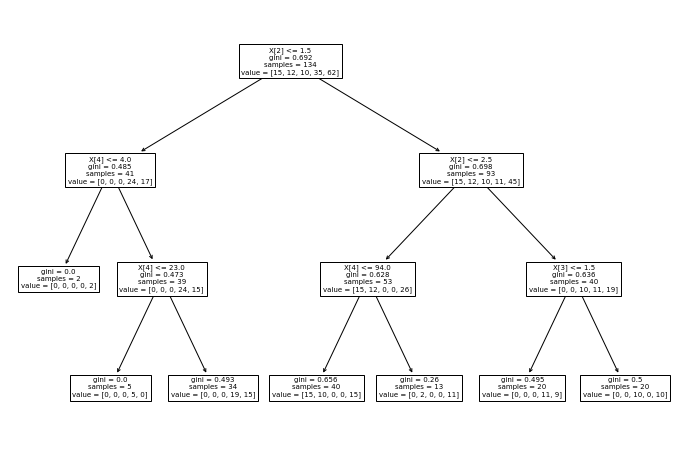

In [7]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

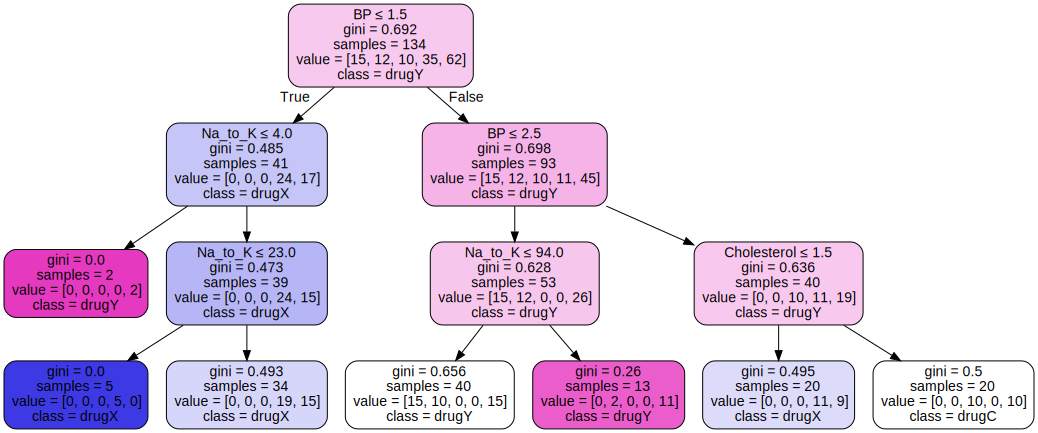

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

### Confusion Matrix

In [9]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 8  0  0  0  0]
 [ 4  0  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  7 12]
 [12  0  5  6  6]]


### Decision Tree Classifier with criterion entropy 
The entropy seems to give the same measurement as the gini index. Therefore, I do not go into much other detail outside of just running the report.

In [10]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

#Compare the train-set and test-set accuracy to check for overfitting.
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Model accuracy score with criterion entropy: 0.4091
Training set score: 0.5448
Test set score: 0.4091


### References:
* https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial
* https://www.datacamp.com/community/tutorials/decision-tree-classification-python